In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from c19_load import load_single_country

In [2]:
CTRY = 'Singapore'
df_sg = load_single_country(country=CTRY)

In [3]:
# 2nd graph, used for highlighting DORSCON Orange
x = np.arange(df_sg.shape[0])
df2 = pd.DataFrame({'x' : x, 'y' : 0})

In [4]:
CONFIRMED__COLNAME = 'total'
ACTIVE__COLNAME = 'active'
DISCHARGED__COLNAME = 'discharged'

LAST_DAYS = 30

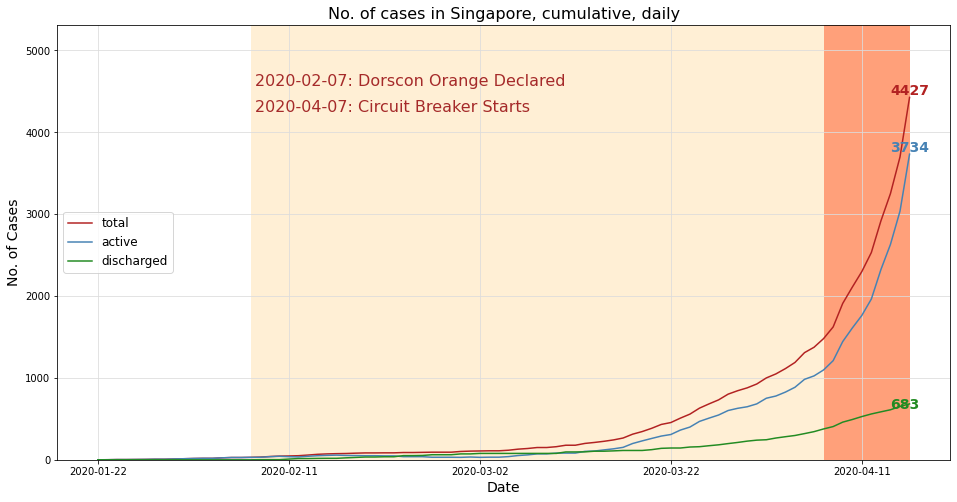

In [5]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.plot(kind='line', x='date', y=CONFIRMED__COLNAME, ax=ax, color='FIREBRICK')
df_sg.plot(kind='line', x='date', y=ACTIVE__COLNAME, ax=ax, color='STEELBLUE')
df_sg.plot(kind='line', x='date', y=DISCHARGED__COLNAME, ax=ax, color='FORESTGREEN')
df2.plot(kind='line', x='x', y='y', ax=ax, linewidth=0)

ax.set_xlabel("Date", fontsize=14)

ylim_max = df_sg[CONFIRMED__COLNAME].max() * 1.2
# ylim_max = (ylim_max//20 + 1)*20

ax.set_ylim(0, ylim_max)
# ax.set_yticks(range(0,ylim_max+1,20))
ax.set_ylabel("No. of Cases", fontsize=14)
ax.grid(color='GAINSBORO')
ax.legend([CONFIRMED__COLNAME, ACTIVE__COLNAME, DISCHARGED__COLNAME], fontsize=12, loc=6)

l_cfm = df_sg.tail(1)[CONFIRMED__COLNAME].tolist()
for i, v in enumerate(l_cfm):
    ax.text(df_sg.index.max()-2, v+30, str(v), fontsize=14, fontweight='bold', color='FIREBRICK')
    
l_lv = df_sg.tail(1)[ACTIVE__COLNAME].tolist()
for i, v in enumerate(l_lv):
    ax.text(df_sg.index.max()-2, v+30, str(int(v)), fontsize=14, fontweight='bold', color='STEELBLUE')
    
l_rec = df_sg.tail(1)[DISCHARGED__COLNAME].tolist()
for i, v in enumerate(l_rec):
    ax.text(df_sg.index.max()-2, v-55, str(int(v)), fontsize=14, fontweight='bold', color='FORESTGREEN')

# DORSCON Orange Colouring
do_index = df_sg[df_sg.date=='2020-02-07'].index[0]
ax.fill_between([do_index,x.max()], 0, ylim_max, facecolor='PAPAYAWHIP')
ax.text(do_index+0.5, ylim_max*0.86,"2020-02-07: Dorscon Orange Declared", fontsize=16, color="BROWN")

# Circuit Breaker
ckr_index = df_sg[df_sg.date=='2020-04-07'].index[0]
ax.fill_between([ckr_index,x.max()], 0, ylim_max, facecolor='LIGHTSALMON')
ax.text(do_index+0.5, ylim_max*0.80,"2020-04-07: Circuit Breaker Starts", fontsize=16, color="BROWN")

ax.set_title("No. of cases in {}, cumulative, daily".format(CTRY), fontsize=16)
plt.show()

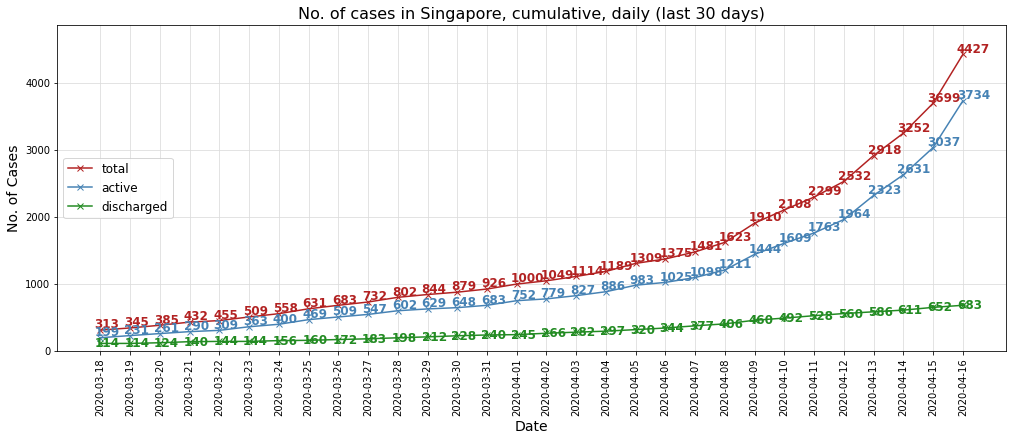

In [6]:
###

fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(1,1,1)

# Plot SG
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=CONFIRMED__COLNAME, ax=ax, marker='x', color='FIREBRICK')
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=ACTIVE__COLNAME, ax=ax, marker='x', color='STEELBLUE')
df_sg.tail(LAST_DAYS).plot(kind='line', x='date', y=DISCHARGED__COLNAME, ax=ax, marker='x', color='FORESTGREEN')

# x & y axes
ax.set_xticks(df_sg.head(LAST_DAYS).index)
ax.set_xticklabels(df_sg.tail(LAST_DAYS)['date'], rotation=90)
ax.set_xlabel("Date", fontsize=14)

ylim_max = int(df_sg.tail(LAST_DAYS)[CONFIRMED__COLNAME].max() * 1.1)

ax.set_ylim(0, ylim_max)
ax.set_ylabel("No. of Cases", fontsize=14)
ax.grid(color='GAINSBORO')
ax.legend([CONFIRMED__COLNAME, ACTIVE__COLNAME, DISCHARGED__COLNAME], fontsize=12, loc=6)

l_cfm = df_sg.tail(LAST_DAYS)[CONFIRMED__COLNAME].tolist()
for i, v in enumerate(l_cfm):
    ax.text(i-0.20, v+30, str(v), fontsize=12, fontweight='bold', color='FIREBRICK')
    
l_lv = df_sg.tail(LAST_DAYS)[ACTIVE__COLNAME].tolist()
for i, v in enumerate(l_lv):
    ax.text(i-0.20, v+30, str(int(v)), fontsize=12, fontweight='bold', color='STEELBLUE')
    
    
l_rec = df_sg.tail(LAST_DAYS)[DISCHARGED__COLNAME].tolist()
for i, v in enumerate(l_rec):
    ax.text(i-0.20, v-55, str(int(v)), fontsize=12, fontweight='bold', color='FORESTGREEN')
    
ax.set_title("No. of cases in {}, cumulative, daily (last {} days)".format(CTRY, LAST_DAYS), fontsize=16)
plt.show()

Sources: 

[Coronavirus outbreak: Singapore raises DORSCON level to Orange; schools to suspend inter-school, external activities](https://www.channelnewsasia.com/news/singapore/wuhan-coronavirus-dorscon-orange-singapore-risk-assessment-12405180)

[COVID-19 outbreak 'a pandemic': WHO chief](https://www.channelnewsasia.com/news/world/covid-19-coronavirus-pandemic-who-chief-12528328)